<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/cnn_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
trans = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

bird


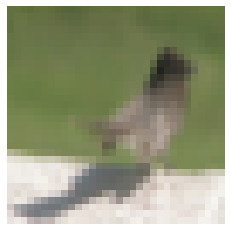

In [11]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0,50000-1)
print(trans[y_train[i][0]])
plt.axis("off")
plt.imshow(x_train[i])

In [12]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
layers = [
      #3*3*3(一個過濾器)*64(個)+64(bias)=1792
      Conv2D(64,3,padding="same",activation="relu",input_shape=(32, 32, 3)),
      MaxPooling2D(),
      #3*3*64(一個過濾器)*128(個)+128(bias)=73856
      Conv2D(128,3,padding="same",activation="relu"),
      MaxPooling2D(),
      Conv2D(256,3,padding="same",activation="relu"),
      GlobalAveragePooling2D(),
      Dense(10,activation="softmax")]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [13]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),optimizer="adam",metrics=["accuracy"])


In [14]:
x_train_norm = x_train/255
x_test_norm = x_test/255


In [7]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callbacks = [ModelCheckpoint("cnn.h5",save_best_only=True),
       EarlyStopping(patience=5,restore_best_weights=True)]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 6s - loss: 1.8627 - accuracy: 0.2986 - val_loss: 1.6441 - val_accuracy: 0.3716
Epoch 2/50
225/225 - 6s - loss: 1.5765 - accuracy: 0.4232 - val_loss: 1.4734 - val_accuracy: 0.4616
Epoch 3/50
225/225 - 6s - loss: 1.4358 - accuracy: 0.4809 - val_loss: 1.3869 - val_accuracy: 0.4966
Epoch 4/50
225/225 - 6s - loss: 1.3493 - accuracy: 0.5144 - val_loss: 1.3074 - val_accuracy: 0.5324
Epoch 5/50
225/225 - 6s - loss: 1.2779 - accuracy: 0.5436 - val_loss: 1.2434 - val_accuracy: 0.5550
Epoch 6/50
225/225 - 6s - loss: 1.2247 - accuracy: 0.5642 - val_loss: 1.1726 - val_accuracy: 0.5762
Epoch 7/50
225/225 - 6s - loss: 1.1665 - accuracy: 0.5869 - val_loss: 1.1488 - val_accuracy: 0.5972
Epoch 8/50
225/225 - 6s - loss: 1.1166 - accuracy: 0.6046 - val_loss: 1.1115 - val_accuracy: 0.6082
Epoch 9/50
225/225 - 6s - loss: 1.0885 - accuracy: 0.6172 - val_loss: 1.1313 - val_accuracy: 0.6028
Epoch 10/50
225/225 - 6s - loss: 1.0626 - accuracy: 0.6272 - val_loss: 1.0530 - val_accuracy: 0.6260

In [8]:
model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.6818 - accuracy: 0.7669


[0.681805431842804, 0.7669000029563904]